# Determining Most Common Cybersecurity Threats 
## Alexandra Vucenovic
### 4-30-24

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploring Dataset:

In [37]:
df = pd.read_csv("cyber-threat-intelligence_all.csv")

print("First few rows of the DataFrame:")
print(df.head())

print("\nDimensions of the DataFrame:")
print(df.shape)

print("\nMissing values in the DataFrame:")
print(df.isnull().sum())

print("\nData types of columns:")
print(df.dtypes)

print("\nSummary statistics of numerical columns:")
print(df.describe())

print("\nUnique values in categorical columns:")
for column in df.select_dtypes(include="object").columns:
    print(f"{column}: {df[column].nunique()} unique values")



First few rows of the DataFrame:
   Unnamed: 0  index                                               text  \
0           0    1.0  This post is also available in:      日本語 (Japa...   
1           1    2.0  The attack vector is very basic and repeats it...   
2           2    3.0  Once executed by the user the first stage malw...   
3           3    4.0   The first known campaign was launched by Crim...   
4           4    5.0  The first stage downloaded the ransomware from...   

                                            entities relations Comments  \
0  [{'id': 45800, 'label': 'malware', 'start_offs...        []       []   
1  [{'id': 48941, 'label': 'attack-pattern', 'sta...        []       []   
2                                                 []        []       []   
3  [{'id': 45806, 'label': 'TIME', 'start_offset'...        []       []   
4                                                 []        []       []   

        id           label  start_offset  end_offset  
0  45800.0

In [38]:
#Needed to find the name of the column that contains the info concerning cyber threats, the name is 'label'

df = pd.read_csv("cyber-threat-intelligence_all.csv")

print(df.columns)

Index(['Unnamed: 0', 'index', 'text', 'entities', 'relations', 'Comments',
       'id', 'label', 'start_offset', 'end_offset'],
      dtype='object')


# What is the most common cyberthreat?

In [39]:
threat_counts = df['label'].value_counts()

# ID most common cyberthreat
most_common_threat = threat_counts.idxmax()
most_common_threat_count = threat_counts.max()

print("Most common cyberthreat:", most_common_threat)
print("Number of occurrences:", most_common_threat_count)

Most common cyberthreat: malware
Number of occurrences: 1911


In [40]:
unique_labels = df['label'].unique()
print(unique_labels)

['malware' 'attack-pattern' nan 'TIME' 'identity' 'SOFTWARE'
 'threat-actor' 'location' 'tools' 'FILEPATH' 'SHA2' 'vulnerability' 'URL'
 'DOMAIN' 'IPV4' 'campaign' 'EMAIL' 'REGISTRYKEY' 'SHA1' 'Infrastucture'
 'MD5' 'url' 'hash']


# How successful is threat intelligence analysis? Show a bar chart of successful threat analysis.


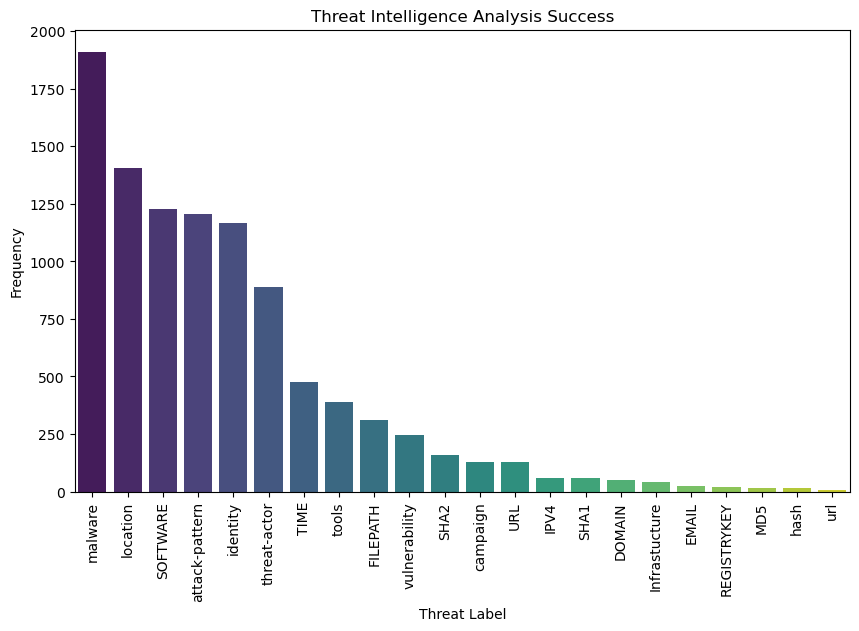

In [41]:
df = pd.read_csv("cyber-threat-intelligence_all.csv")

# Count the occurrences of each label
threat_counts = df['label'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=threat_counts.index, y=threat_counts.values, palette="viridis") # was able to find super cool color combo options
plt.title("Threat Intelligence Analysis Success")
plt.xlabel("Threat Label")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

# How much network traffic data carries malicious code/threats?

In [45]:
#labels related to malicious activity

data = pd.read_csv('cyber-threat-intelligence_all.csv')

malicious_labels = ['malware', 'attack-pattern', 'SOFTWARE', 'threat-actor', 'tools', 'vulnerability', 'DOMAIN', 'IPV4', 'campaign', 'EMAIL', 'REGISTRYKEY', 'MD5', 'hash']

malicious_data = data[data['label'].isin(malicious_labels)]

malicious_proportion = len(malicious_data) / len(data)

print("Percentage of network traffic data carrying malicious code and or threats:", malicious_proportion)


Percentage of network traffic data carrying malicious code and or threats: 0.31013039117352054


# What are the top 3 recommended strategies for identifying cyber threats? Show a bar chart comparing them.

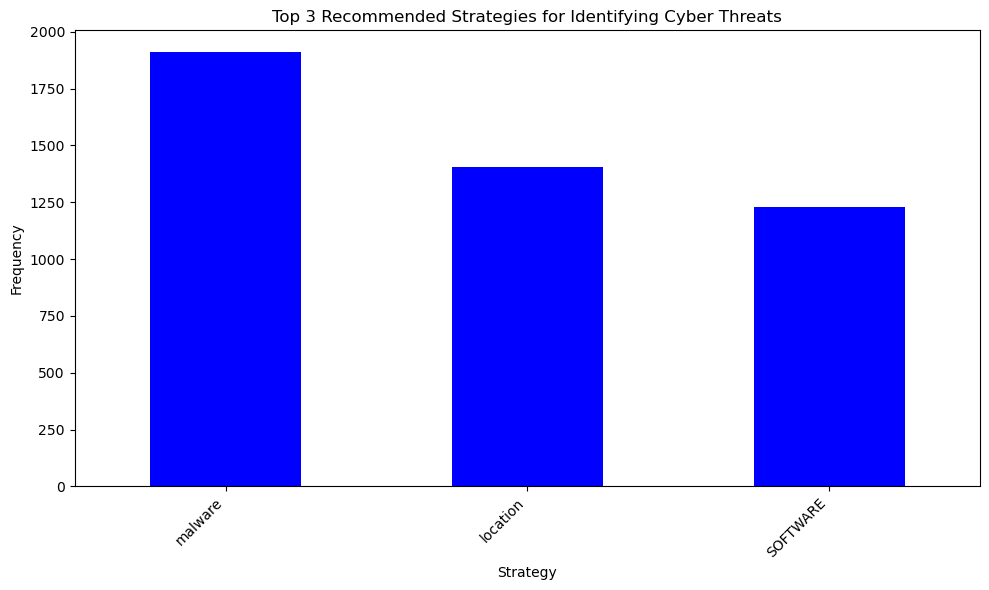

In [46]:
data = pd.read_csv('cyber-threat-intelligence_all.csv')

strategy_counts = data['label'].value_counts()


top_3_strategies = strategy_counts.head(3)


plt.figure(figsize=(10, 6))
top_3_strategies.plot(kind='bar', color='blue')
plt.title('Top 3 Recommended Strategies for Identifying Cyber Threats')
plt.xlabel('Strategy')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Is there any correlation between the length of the threat description and the likelihood of it being a serious threat? Show a bar chart 

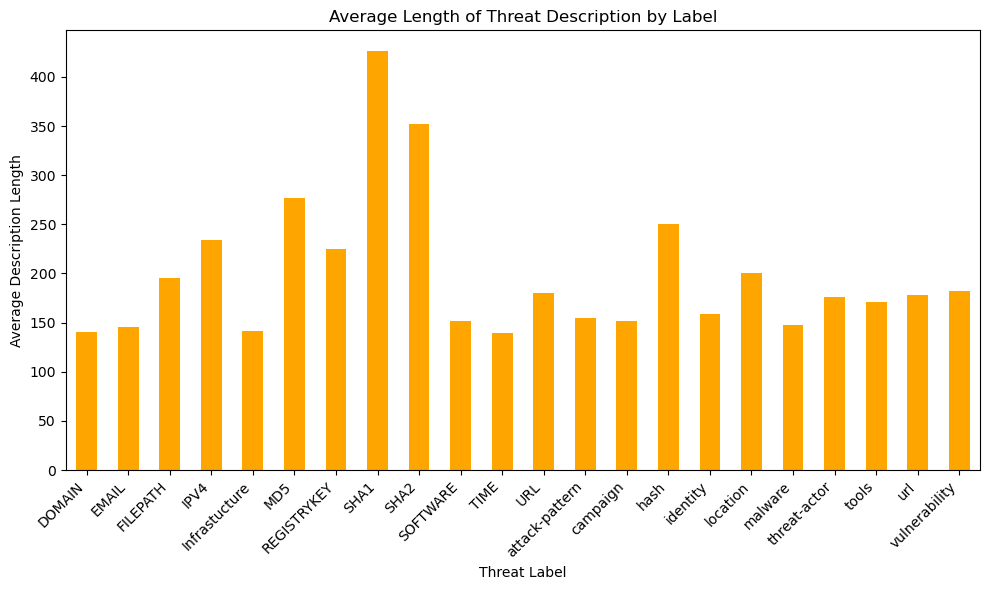

In [47]:
data = pd.read_csv('cyber-threat-intelligence_all.csv')

labeled_data = data.dropna(subset=['label'])


labeled_data = labeled_data.copy()


labeled_data['description_length'] = labeled_data['text'].apply(lambda x: len(str(x)))


avg_description_length = labeled_data.groupby('label')['description_length'].mean()


plt.figure(figsize=(10, 6))
avg_description_length.plot(kind='bar', color='orange')
plt.title('Average Length of Threat Description by Label')
plt.xlabel('Threat Label')
plt.ylabel('Average Description Length')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()